In [1]:
#!pip install tensorflow 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
from lab_utils_common import dlc
from lab_neurons_utils import plt_prob_1d, sigmoidnp, plt_linear, plt_logistic
plt.style.use('./deeplearning.mplstyle')
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

#### lab1

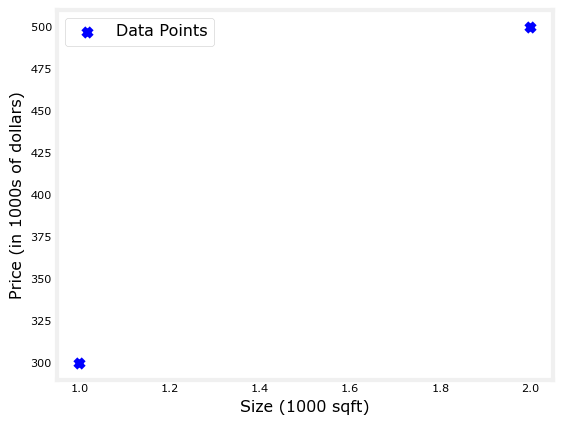

In [2]:
X_train, Y_train = np.array([[1.0],[2.0]], dtype=np.float32), np.array([[300.0],[500.0]], dtype=np.float32)

fig,ax = plt.subplots(1,1)
ax.scatter(X_train, Y_train, marker='x', c='b', label='Data Points')
ax.legend(fontsize='x-large')
ax.set_ylabel('Price (in 1000s of dollars)', fontsize='x-large')
ax.set_xlabel('Size (1000 sqft)', fontsize='x-large')
plt.show()

In [3]:
linear_layer = tf.keras.layers.Dense(units=1, activation = 'linear')

linear_layer.get_weights()

[]

In [4]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)

w, b= linear_layer.get_weights()
print(f"w = {w}, b={b}")

tf.Tensor([[-1.56]], shape=(1, 1), dtype=float32)
w = [[-1.56]], b=[0.]


In [5]:
set_w = np.array([[200]])
set_b = np.array([100])

# set_weights takes a list of numpy arrays
linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


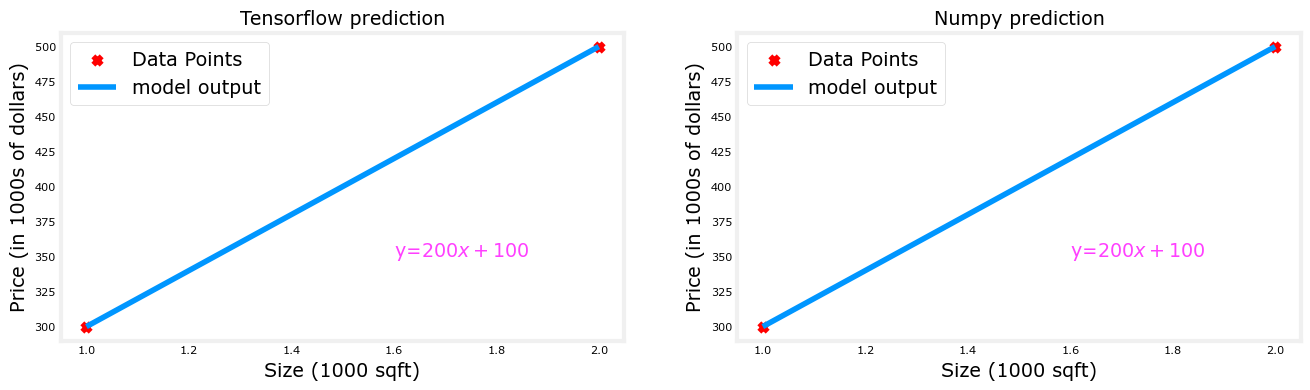

In [6]:
#single dataset
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)
alin = np.dot(set_w,X_train[0].reshape(1,1)) + set_b
print(alin)

#vectorized
prediction_tf = linear_layer(X_train)
prediction_np = np.dot( X_train, set_w) + set_b


plt_linear(X_train, Y_train, prediction_tf, prediction_np)

In [7]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

pos = Y_train == 1
neg = Y_train == 0
X_train[pos]

array([3., 4., 5.], dtype=float32)

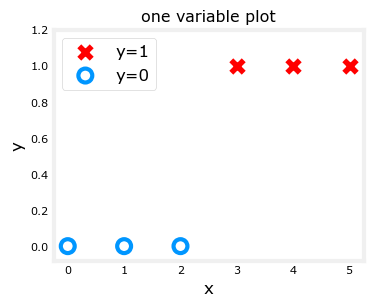

In [8]:
pos = Y_train == 1
neg = Y_train == 0

fig,ax = plt.subplots(1,1,figsize=(4,3))
ax.scatter(X_train[pos], Y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", facecolors='none', 
              edgecolors=dlc["dlblue"],lw=3)

ax.set_ylim(-0.08, 1.2)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.legend(fontsize=12)
plt.show()

In [9]:
model = Sequential(
    [
        tf.keras.layers.Dense(1, input_dim=1,  activation = 'sigmoid', name='L1')
    ]
)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [11]:
#random assign w,b if not specified

logistic_layer = model.get_layer('L1')
w,b = logistic_layer.get_weights()
print(w,b)
print(w.shape,b.shape)

#specified 
set_w = np.array([[2]])
set_b = np.array([-4.5])
# set_weights takes a list of numpy arrays
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[[-1.72]] [0.]
(1, 1) (1,)
[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [12]:
a1 = model.predict(X_train[0].reshape(1,1))
print(a1)
alog = sigmoidnp(np.dot(set_w,X_train[0].reshape(1,1)) + set_b)
print(alog)

1/1 [==============================] - 0s 129ms/step
[[0.01]]
[[0.01]]


1/1 [==============================] - 0s 18ms/step


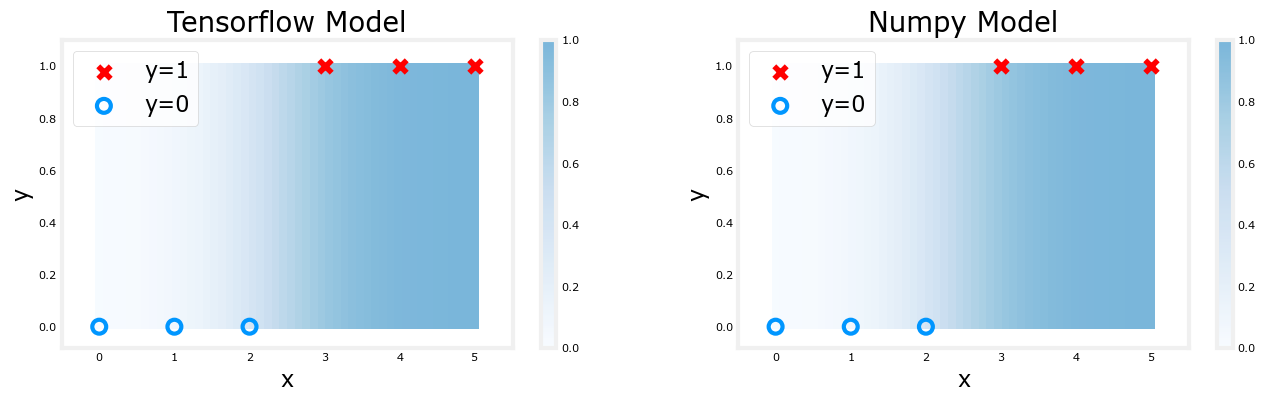

In [13]:
plt_logistic(X_train, Y_train, model, set_w, set_b, pos, neg)

#### real

In [14]:
#np.array matrix
#layers

#output a1 
#input a1 to a2
#if condition

In [15]:
np.array([[]])

layer_1 = Dense(unit=25, activation='sigmoid')
a1 = layer_1(x)

layer_2 = Dense(unit=15, activation='sigmoid')
a2 = layer_2(a1)

layer_3 = Dense(unit=1, activation='sigmoid')
a3 = layer_3(a2)

#convert tensor to numpy
a1.numpy()

#if yhat


#when use sequential, no need a1 = layer_1(x) 
model = Sequential([layer_1, layer_2])
model.compile()
model.fit(x,y)
model.predict(x_new)



TypeError: __init__() missing 1 required positional argument: 'units'

#### lab2 
matrix: 
    [[row1],
     [row2],
     [row3]]
    stack by rows
    
    no of brackets == no of dimensions
    matrix good for tensorflow

In [ ]:
from lab_coffee_utils import load_coffee_data, plt_roast, plt_prob, plt_layer, plt_network, plt_output_unit

In [ ]:
X,Y = load_coffee_data();
print(X.shape, Y.shape)
plt_roast(X,Y)

back-propagation would proceed more quickly if the data is normalized
Using Keras normalization layer

In [ ]:
print(f'Temp Max, Min pre-normalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}')
print(f'Duration Max, Min pre-normalization: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}')

norm_1 = tf.keras.layers.Normalization(axis=-1)
norm_1.adapt(X) # learn mean, variance
Xn = norm_1(X)

print(f'Temp Max, Min post-normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}')
print(f'Duration Max, Min post-normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}')

#### what is tile

In [ ]:


Xt = np.tile(Xn,(1000,1))
Yt = np.tile(Y,(1000,1))
print(Xt.shape, Yt.shape)

In [ ]:
tf.random.set_seed(1234)
model = Sequential(
    [
        tf.keras.Input(shape=(2,)),
        Dense(units=3, activation='sigmoid', name='layer_1'),
        Dense(units=1, activation='sigmoid', name='layer_2')
    ]
)

#tf.keras.Input(shape=(2,)) # specificed expected shape of input, no need in practice (model.fit would specify)
model.summary()

In [ ]:
# w,b parameters
L1_num_params = 2*3+3
L2_num_params = 3*1+1 
print(f'L1 params:{L1_num_params}, L2 params:{L2_num_params}')

W1,b1 = model.get_layer('layer_1').get_weights()
W2,b2 = model.get_layer('layer_2').get_weights()
print(f'W1{W1.shape}:\n', W1, f'\nb1{b1.shape}:',b1)
print(f'W2{W2.shape}:\n', W2, f'\nb2{b2.shape}:',b2)

In [ ]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(Xt,Yt,epochs=10)

In [ ]:
# update weight

W1, b1 = model.get_layer("layer_1").get_weights()
W2, b2 = model.get_layer("layer_2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

In [ ]:
# prediction

X_test = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example


X_testn = norm_1(X_test)

predictions = model.predict(X_testn)
print("predictions = \n", predictions)

#### Epochs and batches
In the `compile` statement above, the number of `epochs` was set to 10. This specifies that the entire data set should be applied during training 10 times.  During training, you see output describing the progress of training that looks like this:
```
Epoch 1/10
6250/6250 [==============================] - 6s 910us/step - loss: 0.1782
```
The first line, `Epoch 1/10`, describes which epoch the model is currently running. For efficiency, the training data set is broken into 'batches'. The default size of a batch in Tensorflow is 32. There are 200000 examples in our expanded data set or 6250 batches. The notation on the 2nd line `6250/6250 [====` is describing which batch has been executed.

In [ ]:
# method 1
yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0 
print(f'decisions = \n{yhat}')

# method 2
yhat = (predictions >= 0.5).astype(int)
print(f'decisions = \n{yhat}')

In [ ]:
plt_layer(X,Y.reshape(-1,),W1,b1,norm_1)

The function plot of the final layer is a bit more difficult to visualize. It's inputs are the output of the first layer. We know that the first layer uses sigmoids so their output range is between zero and one. We can create a 3-D plot that calculates the output for all possible combinations of the three inputs. This is shown below. Above, high output values correspond to 'bad roast' area's. Below, the maximum output is in area's where the three inputs are small values corresponding to 'good roast' area's.

In [ ]:
plt_output_unit(W2,b2)

In [ ]:
netf= lambda x : model.predict(norm_1(x))
plt_network(X,Y,netf)

#### lab3

In [ ]:
from lab_utils_common import dlc, sigmoid
from lab_coffee_utils import load_coffee_data, plt_roast, plt_prob, plt_layer, plt_network, plt_output_unit

In [ ]:
X,Y = load_coffee_data();
print(X.shape, Y.shape)
plt_roast(X,Y)

In [ ]:
print(f"Temperature Max, Min pre normalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
print(f"Duration    Max, Min pre normalization: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)  # learns mean, variance
Xn = norm_l(X)
print(f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

In [ ]:
g = sigmoid

In [ ]:
x = np.array([200,17])



#layer1
w1_1 = np.array([1,2])
b1_1 = np.array([-1])
z1_1 = np.dot(w1_1,x)+b1_1
a1_1 = sigmoid(z1_1)

a1 = np.array([a1_1,a1_2,a1_3])

#layer2
w2_1 = np.array([-7,8,9])
b2_1 = np.array([3])
z2_1 = np.dot(w2_1,a1)+b2_1



In [ ]:
# CAPS = matrix
W = np.array(
    [
        [1,-3,5],
        [2,4,-6]
    ]
)

b = np.array([-1,1,2])



def my_dense(a_in, W, b):
    """
    Computes dense layer
    Args:
      a_in (ndarray (n, )) : Data, 1 example 
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (j, )) : bias vector, j units  
    Returns
      a_out (ndarray (j,))  : j units|
    """
    units = W.shape[1]
    a_out = np.zeros(units)
    for j in range(units):               
        w = W[:,j]                                    
        z = np.dot(w, a_in) + b[j]         
        a_out[j] = g(z)               
    return(a_out)



def dense(a_in,W,b):
    units = W.shape[1]
    a_out = np.zeros(units)
    for j in range(units):
        w = W[:,j]
        z = np.dot(w,a_in) + b[j]
        a_out[j] = g(z)
    return a_out


def my_sequential(x, W1, b1, W2, b2):
    a1 = my_dense(x,  W1, b1)
    a2 = my_dense(a1, W2, b2)
    return(a2)

def sequential(x):
    a1 = dense(x,W1,b1)
    a2 = dense(a1,W2,b2)
    f_x = a2
    return f_x

In [ ]:
W1_tmp = np.array( [[-8.93,  0.29, 12.9 ], [-0.1,  -7.32, 10.81]] )
b1_tmp = np.array( [-9.82, -9.28,  0.96] )
W2_tmp = np.array( [[-31.18], [-27.59], [-32.56]] )
b2_tmp = np.array( [15.41] )

def my_predict(X, W1, b1, W2, b2):
    m = X.shape[0]
    p = np.zeros((m,1))
    for i in range(m):
        p[i,0] = my_sequential(X[i], W1, b1, W2, b2)
    return(p)

X_tst = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example
X_tstn = norm_l(X_tst)  # remember to normalize
predictions = my_predict(X_tstn, W1_tmp, b1_tmp, W2_tmp, b2_tmp)

yhat = (predictions >= 0.5).astype(int)
print(f"decisions = \n{yhat}")

network func
- 
This graph shows the operation of the whole network and is identical to the Tensorflow result from the previous lab.
The left graph is the raw output of the final layer represented by the blue shading. This is overlaid on the training data represented by the X's and O's.   
The right graph is the output of the network after a decision threshold. The X's and O's here correspond to decisions made by the network.  

In [ ]:
netf= lambda x : my_predict(norm_l(x),W1_tmp, b1_tmp, W2_tmp, b2_tmp)
plt_network(X,Y,netf)